# Load and Inspect Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

* Pandas is used for data manipulation and analysis.
* Matplotlib and Seaborn are used for data visualization.
* Numpy is used for numerical operations.
* Scikit-learn is used for machine learning tasks.

In [54]:
df = pd.read_csv('./zameen-updated.csv', parse_dates=['date_added'])
df.head().T

,0,1,2,3,4
property_id,237062,346905,386513,656161,841645
location_id,3325,3236,764,340,3226
page_url,https://www.zameen.com/Property/g_10_g_10_2_gr...,https://www.zameen.com/Property/e_11_2_service...,https://www.zameen.com/Property/islamabad_g_15...,https://www.zameen.com/Property/islamabad_bani...,https://www.zameen.com/Property/dha_valley_dha...
property_type,Flat,Flat,House,House,House
price,10000000,6900000,16500000,43500000,7000000
location,G-10,E-11,G-15,Bani Gala,DHA Defence
city,Islamabad,Islamabad,Islamabad,Islamabad,Islamabad
province_name,Islamabad Capital,Islamabad Capital,Islamabad Capital,Islamabad Capital,Islamabad Capital
latitude,33.67989,33.700993,33.631486,33.707573,33.492591
longitude,73.01264,72.971492,72.926559,73.151199,73.301339


* Load the dataset and parse the 'date_added' column as datetime.
* Display the first few rows, a statistical summary, and info about the dataset.

In [55]:
df.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,date_added,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,2019-05-22 04:55:12.805290752,5.892188
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,2018-08-05 00:00:00,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,2019-05-05 00:00:00,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,2019-06-27 00:00:00,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,2019-07-05 00:00:00,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,2019-07-18 00:00:00,800.000000
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,NaN,5.778327


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   property_id    168446 non-null  int64         
 1   location_id    168446 non-null  int64         
 2   page_url       168446 non-null  object        
 3   property_type  168446 non-null  object        
 4   price          168446 non-null  int64         
 5   location       168446 non-null  object        
 6   city           168446 non-null  object        
 7   province_name  168446 non-null  object        
 8   latitude       168446 non-null  float64       
 9   longitude      168446 non-null  float64       
 10  baths          168446 non-null  int64         
 11  area           168446 non-null  object        
 12  purpose        168446 non-null  object        
 13  bedrooms       168446 non-null  int64         
 14  date_added     168446 non-null  datetime64[ns]
 15  

# Data Cleaning and Feature Engineering
* Drop the 'page_url' column as it's not useful for analysis.

In [57]:
df.drop('page_url', axis=1, inplace=True)

* Extract and create new columns from the 'date_added' column.
* Drop the original 'date_added' column.

In [58]:
df['date_added_year'] = df.date_added.dt.year
df['date_added_month'] = df.date_added.dt.month
df['date_added_day'] = df.date_added.dt.day
df['date_added_day_of_week'] = df.date_added.dt.day_of_week
df['date_added_day_of_year'] = df.date_added.dt.day_of_year
df.drop('date_added', axis=1, inplace=True)

In [59]:
df.head().T

,0,1,2,3,4
property_id,237062,346905,386513,656161,841645
location_id,3325,3236,764,340,3226
property_type,Flat,Flat,House,House,House
price,10000000,6900000,16500000,43500000,7000000
location,G-10,E-11,G-15,Bani Gala,DHA Defence
city,Islamabad,Islamabad,Islamabad,Islamabad,Islamabad
province_name,Islamabad Capital,Islamabad Capital,Islamabad Capital,Islamabad Capital,Islamabad Capital
latitude,33.67989,33.700993,33.631486,33.707573,33.492591
longitude,73.01264,72.971492,72.926559,73.151199,73.301339
baths,2,3,6,4,3


# Identifying Data Types and Missing Values
* Identify and print numeric columns.

In [60]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

property_id
location_id
price
latitude
longitude
baths
bedrooms
Area Size
date_added_year
date_added_month
date_added_day
date_added_day_of_week
date_added_day_of_year


* Identify and print numeric columns with missing values.

In [61]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if content.isna().sum():
            print(label)

* Identify and print non-numeric columns.

In [62]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

property_type
location
city
province_name
area
purpose
agency
agent
Area Type
Area Category


* Identify and print non-numeric columns with missing values.

In [63]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        if content.isna().sum():
            print(label)

agency
agent


# Convert Categorical Columns
* Convert non-numeric columns to ordered categorical types.

In [64]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = content.astype('category').cat.as_ordered()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   property_id             168446 non-null  int64   
 1   location_id             168446 non-null  int64   
 2   property_type           168446 non-null  category
 3   price                   168446 non-null  int64   
 4   location                168446 non-null  category
 5   city                    168446 non-null  category
 6   province_name           168446 non-null  category
 7   latitude                168446 non-null  float64 
 8   longitude               168446 non-null  float64 
 9   baths                   168446 non-null  int64   
 10  area                    168446 non-null  category
 11  purpose                 168446 non-null  category
 12  bedrooms                168446 non-null  int64   
 13  agency                  124375 non-null  category
 14  agen

# Data Visualization
* Plot the distribution of `bedrooms`.

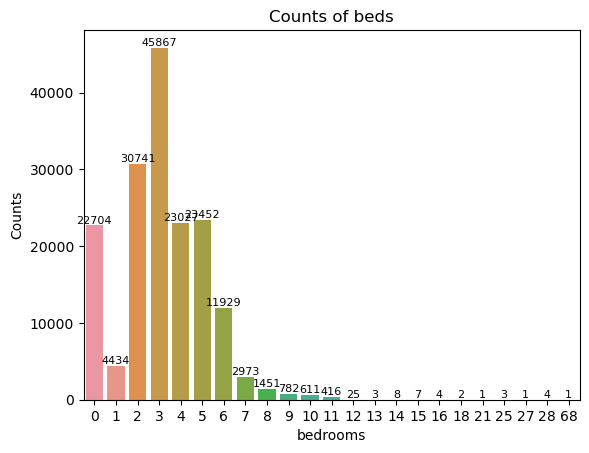

In [66]:
bed_counts = df.bedrooms.value_counts()
ax = sns.barplot(x=bed_counts.index, y=bed_counts.values)
ax.bar_label(ax.containers[0], fontsize=8)
plt.title("Counts of beds")
plt.xlabel("bedrooms")
plt.ylabel("Counts");

* Plot the distribution of `baths`.

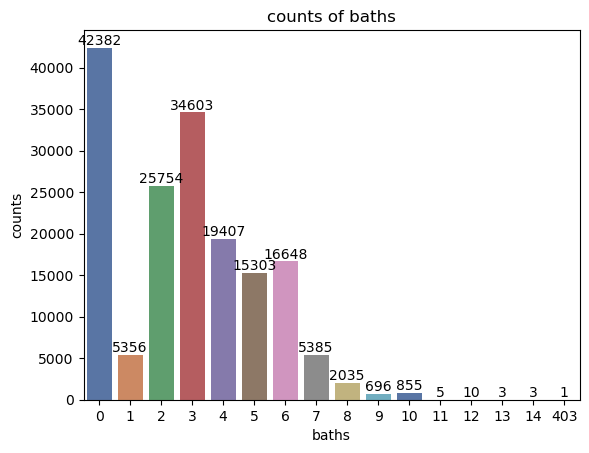

In [67]:
count_bathrooms = df.baths.value_counts()
ax = sns.barplot(x = count_bathrooms.index, y = count_bathrooms.values,palette="deep")
ax.bar_label(ax.containers[0])
plt.title("counts of baths")
plt.xlabel("baths")
plt.ylabel("counts")
plt.show();

* Plot the distribution of 'city'.

C:\Users\muham\env\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


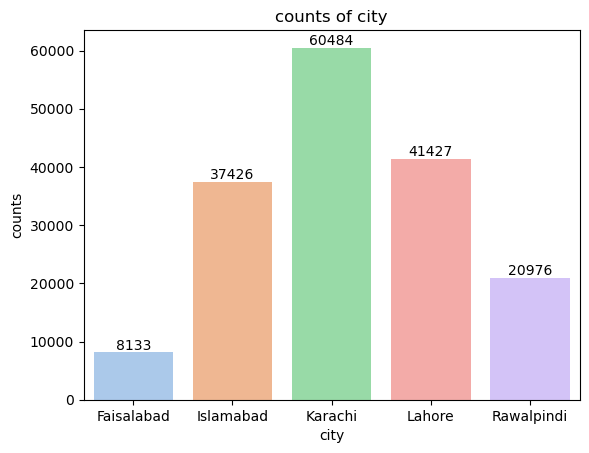

In [68]:
city_counts = df.city.value_counts()
ax = sns.barplot(x = city_counts.index, y = city_counts.values, palette="pastel")
ax.bar_label(ax.containers[0])
plt.title("counts of city")
plt.xlabel("city")
plt.ylabel("counts")
plt.show()

* Plot pairwise relationships of selected features against 'price'.

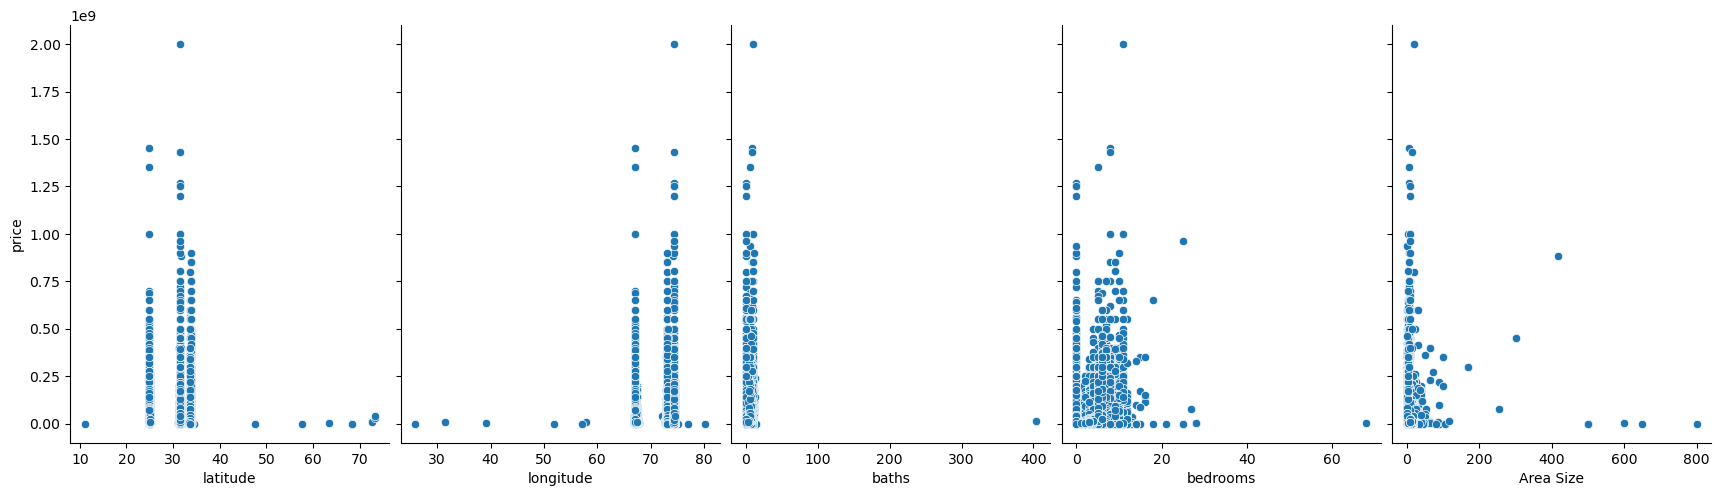

In [69]:
# Plot a boxplot of 'price'.
sns.pairplot(df, x_vars=['latitude', 'longitude', 'baths', 'bedrooms', 'Area Size'], y_vars='price', height=5, aspect=0.7)
plt.show()

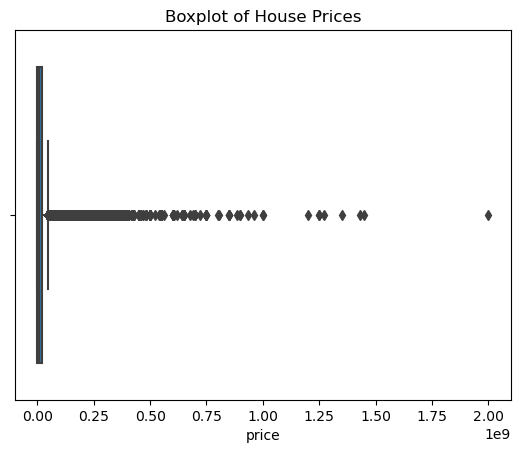

In [70]:
# Plot a heatmap of the correlation matrix of numeric features.
sns.boxplot(x=df['price'])
plt.title('Boxplot of House Prices')
plt.show()

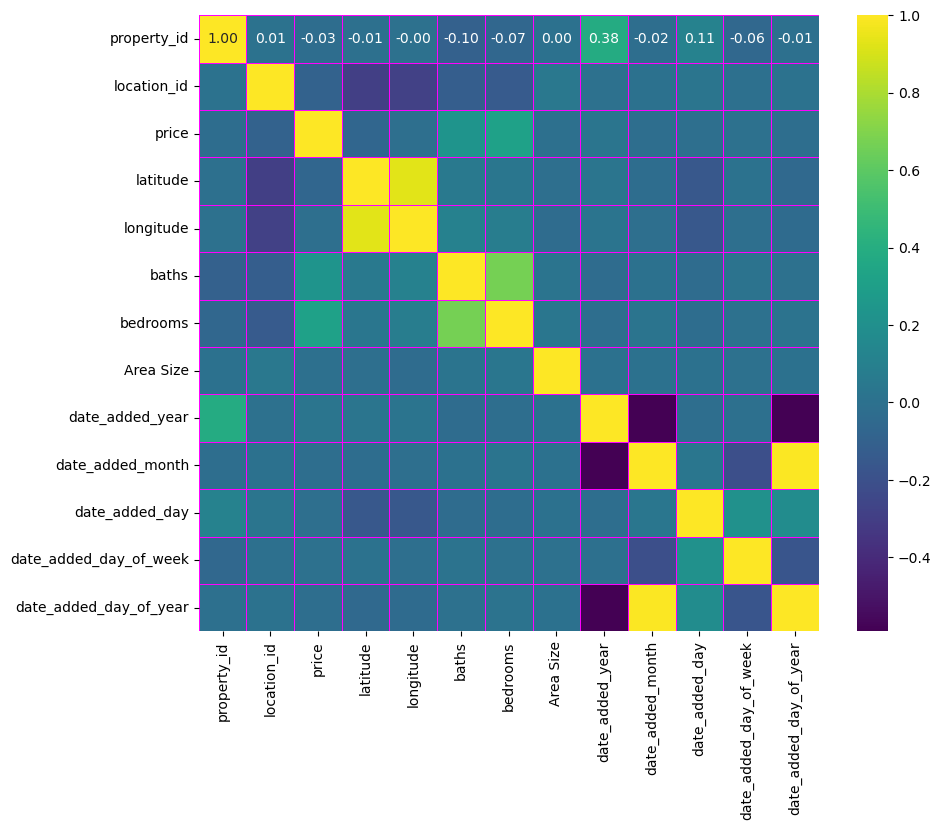

In [71]:
# Plot a heatmap of the correlation matrix of numeric features.
corr_matrx = df.corr(numeric_only=True)
fig,ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr_matrx, cmap='viridis', fmt='.2f', annot=True,linewidths=0.5, linecolor='magenta')

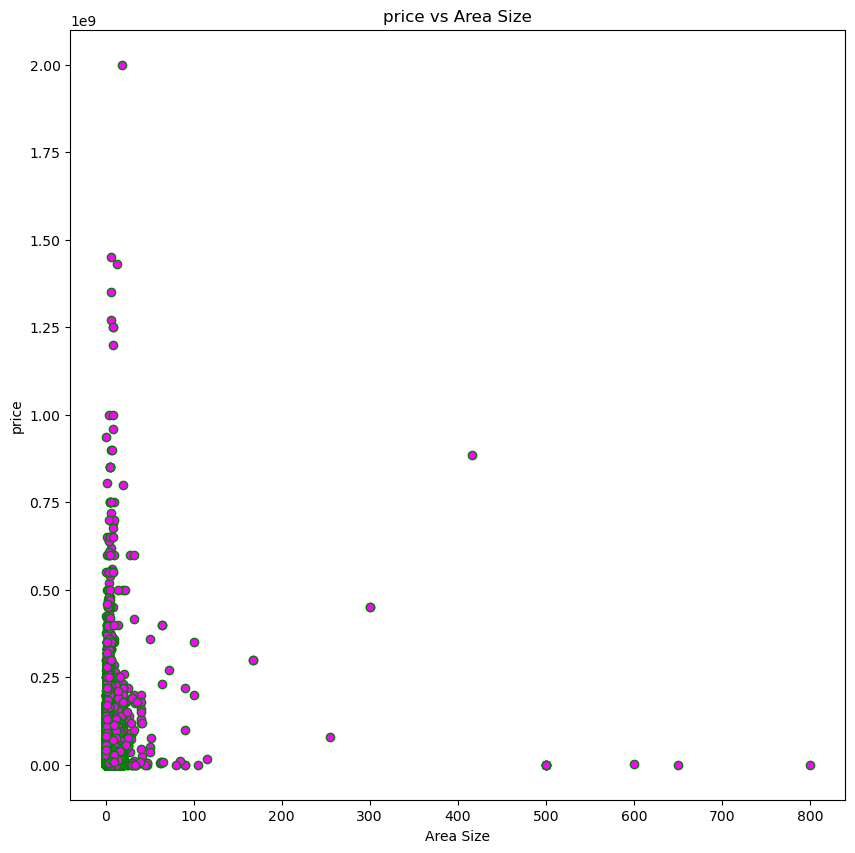

In [72]:
# Plot a scatter plot of 'Area Size' vs 'price'.
fig, ax = plt.subplots(figsize=(10,10))
scatter = ax.scatter(x=df['Area Size'], y=df['price'], c="magenta", edgecolors='green')
ax.set(title='price vs Area Size',xlabel='Area Size', ylabel='price');

# Handle Missing Values for Categorical Columns
* Handle missing values for non-numeric columns by creating new columns indicating missing values and converting categories to numeric codes.

In [73]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label+'missing'] = pd.isnull(content)
        df[label] = pd.Categorical(content).codes + 1

In [74]:
df.head().T

,0,1,2,3,4
property_id,237062,346905,386513,656161,841645
location_id,3325,3236,764,340,3226
property_type,2,2,3,3,3
price,10000000,6900000,16500000,43500000,7000000
location,489,416,494,212,352
city,2,2,2,2,2
province_name,1,1,1,1,1
latitude,33.67989,33.700993,33.631486,33.707573,33.492591
longitude,73.01264,72.971492,72.926559,73.151199,73.301339
baths,2,3,6,4,3


# Prepare Data for Modeling`
* Separate features (x) and target (y).
* Standardize the features using `StandardScaler`.
* Split the data into training and test sets.

In [75]:
x = df.drop('price', axis=1)
y = df.price

In [32]:
scalar = StandardScaler()
transformed_x = scalar.fit_transform(x)
transformed_x.head()

In [33]:
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

# Model Training and Evaluation
* Initialize and fit a `RandomForestRegressor` model.
* Evaluate the model on the test set.

In [34]:
model = RandomForestRegressor(random_state=42)

In [35]:
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8665266704273971

# Hyperparameter Tuning with RandomizedSearchCV
* Define a parameter grid for hyperparameter tuning.
* Use `RandomizedSearchCV` to find the best hyperparameters.
* Evaluate the model with the best hyperparameters on the test set.

In [36]:
from sklearn.model_selection import RandomizedSearchCV
rs_grid = {
    'n_estimators': np.arange(10,200,10),           # Number of trees in the forest
    'max_features': [0.5,1, 'sqrt'],           # Number of features to consider at every split
    'max_depth': np.arange(10, 100),              # Maximum number of levels in tree
    'min_samples_split': np.arange(2, 10,2),        # Minimum number of samples required to split a node
    'min_samples_leaf': np.arange(1, 10,2),         # Minimum number of samples required at each leaf node
    'bootstrap': [True]                  # Whether bootstrap samples are used when building trees
}
rs_model = RandomizedSearchCV(estimator=model, param_distributions=rs_grid, n_jobs=-1,cv=2,random_state=42)
rs_model.fit(x_train, y_train)

RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99]),
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=42)

In [37]:
rs_model.best_params_

{'n_estimators': 150,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_features': 0.5,
 'max_depth': 58,
 'bootstrap': True}

In [76]:
rs_model.score(x_test, y_test)

0.8737098380967974

Mean Absolute Error (MAE): 3090620.418463026
Mean Squared Error (MSE): 142333050317583.88
Root Mean Squared Error (RMSE): 11930341.584279299
R-squared (R2): 0.8737098380967974
Explained Variance Score: 0.8737098380967974


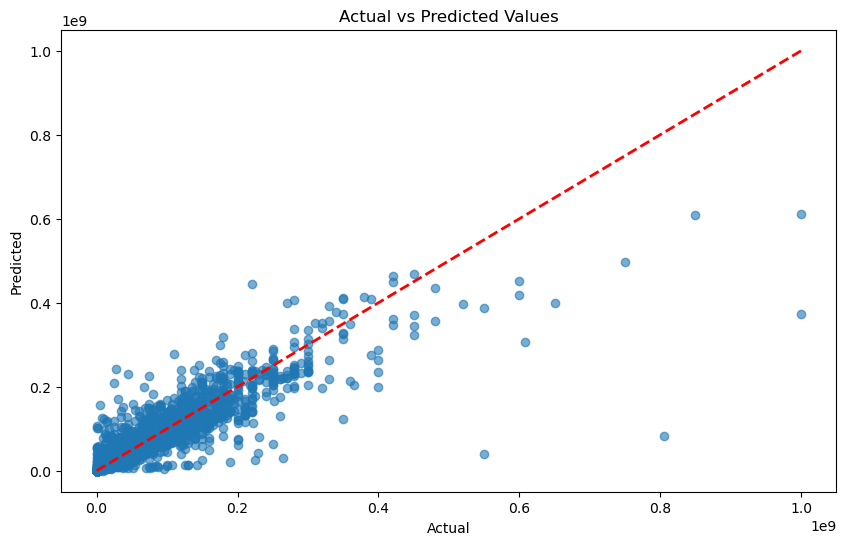

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict the target values for the test set
y_pred = rs_model.predict(x_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared (R2 Score)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")

# Calculate Explained Variance Score
explained_variance = r2_score(y_test, y_pred)
print(f"Explained Variance Score: {explained_variance}")

# If you want to plot the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()